<a href="https://colab.research.google.com/github/AlexDawes-01/AlexDawes-Engineering_Portfolio/blob/main/Copy_of_Arch_IF_2D_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Results saved to temperature_results_1.npy


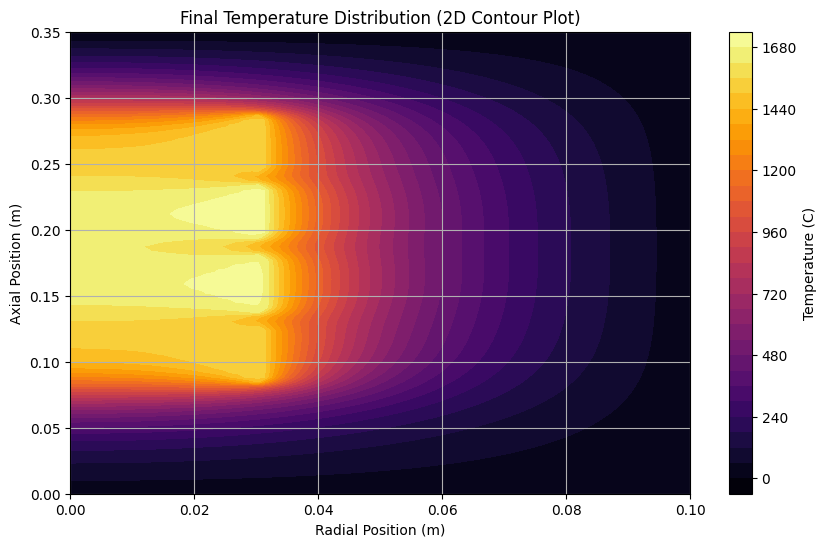

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

@njit
def run_simulation(N, Z, dt, T_total, rho, cp_Graphite, cp_Mgo, cp_slag, k_MgO, k_Graphite, k_slag, T_left, V, r_min, r_max, Z_min, Z_max, initial_conditions=None):

    # Radial discretization
    dr = (r_max - r_min) / (N - 1)  # Radial step size
    r = np.linspace(r_min, r_max, N)  # Array of radial positions
    Nt = int(T_total / dt)  # Number of time steps
    z = np.linspace(Z_min, Z_max, Z)  # Array of z positions
    dz = (Z_max - Z_min) / (Z - 1)  # Step size in Z-direction

    # Material densities
    rho_Mgo = 3580
    rho_Graphite = 1800
    rho_slag = 3200

    # Zirconia
    rho_Zirconia = 5600
    k_Zr = 1.2
    cp_Zr = 600

    # Create 2D arrays for material properties (N x Nz)
    rho_values = np.ones((N, Z)) * rho_Mgo  # Default is MgO for all points
    k_values = np.ones((N, Z)) * k_MgO  # Default is MgO for all points
    cp_values = np.ones((N, Z)) * cp_Mgo  # Default is MgO for all points

    # Define radial regions for different materials (as percentages of the radial and axial domain)
    middle_start = int(0.36 * N)  # Graphite start (radial)
    middle_end = int(0.45 * N)  # Graphite end (radial)
    slagr_start = int(0 * N)  # Slag start (radial)
    slagr_end = int(0.25 * N)  # Slag end (radial)
    slagz_start=int(0.4*Z)
    slagz_end=int(1*Z)
    Zirconia_start = int(0.46 * N)  # Zirconia start (radial)
    Zirconia_end = int(0.65 * N)  # Zirconia end (radial)
    gbz_start=int(0.2*Z)
    gbz_end=int(0.25*Z)
    gbr_start=int(0*N)
    gbr_end=int(0.36*N)
    lowest_z=int(0.3*Z)
    highest_z=int(0.8*Z)
    zrz_base_start=int(0*Z)
    zrz_base_end=int(0.09*Z)
    zrr_base_start=int(0*N)
    zrr_base_end=int(0.36*N)

    # Define triangle vertices (in percentages of domain)
    r_top, z_top = 0.2 * N, 0.75 * Z  # Apex at the left
    r_base, z_base_start = 0.3 * N, 0.7 * Z  # Bottom-left of the base
    z_base_end = 0.8 * Z  # Bottom-right of the base

    # Loop through the grid and check if each point is in the triangle
    for k in range(N):  # Loop over radial domain
        for p in range(Z):  # Loop over axial domain
            if r_top <= k <= r_base:  # Within triangle width
                # Calculate slant boundaries for the current radial position `r`
                left_bound = z_top + (z_base_start - z_top) / (r_base - r_top) * (k - r_top)
                right_bound = z_top + (z_base_end - z_top) / (r_base - r_top) * (k - r_top)
                if left_bound <= p <= right_bound:
                    rho_values[k, p] = rho_Graphite  # Mark as inside the triangle
                    cp_values[k, p] = cp_Graphite
                    k_values[k, p] = k_Graphite

    # Define triangle vertices (in percentages of domain)
    r_top, z_top = 0.2 * N, 0.6 * Z  # Apex at the left
    r_base, z_base_start = 0.3 * N, 0.55 * Z  # Bottom-left of the base
    z_base_end = 0.65 * Z  # Bottom-right of the base

    # Loop through the grid and check if each point is in the triangle
    for k in range(N):  # Loop over radial domain
        for p in range(Z):  # Loop over axial domain
            if r_top <= k <= r_base:  # Within triangle width
                # Calculate slant boundaries for the current radial position `r`
                left_bound = z_top + (z_base_start - z_top) / (r_base - r_top) * (k - r_top)
                right_bound = z_top + (z_base_end - z_top) / (r_base - r_top) * (k - r_top)
                if left_bound <= p <= right_bound:
                    rho_values[k, p] = rho_Graphite  # Mark as inside the triangle
                    cp_values[k, p] = cp_Graphite
                    k_values[k, p] = k_Graphite

    # Define triangle vertices (in percentages of domain)
    r_top, z_top = 0.2 * N, 0.45 * Z  # Apex at the left
    r_base, z_base_start = 0.3 * N, 0.4 * Z  # Bottom-left of the base
    z_base_end = 0.5 * Z  # Bottom-right of the base

    # Loop through the grid and check if each point is in the triangle
    for k in range(N):  # Loop over radial domain
        for p in range(Z):  # Loop over axial domain
            if r_top <= k <= r_base:  # Within triangle width
                # Calculate slant boundaries for the current radial position `r`
                left_bound = z_top + (z_base_start - z_top) / (r_base - r_top) * (k - r_top)
                right_bound = z_top + (z_base_end - z_top) / (r_base - r_top) * (k - r_top)
                if left_bound <= p <= right_bound:
                    rho_values[k, p] = rho_Graphite  # Mark as inside the triangle
                    cp_values[k, p] = cp_Graphite
                    k_values[k, p] = k_Graphite

    # Define triangle vertices (in percentages of domain)
    r_top, z_top = 0.2 * N, 0.3 * Z  # Apex at the left
    r_base, z_base_start = 0.3 * N, 0.25 * Z  # Bottom-left of the base
    z_base_end = 0.35 * Z  # Bottom-right of the base

    # Loop through the grid and check if each point is in the triangle
    for k in range(N):  # Loop over radial domain
        for p in range(Z):  # Loop over axial domain
            if r_top <= k <= r_base:  # Within triangle width
                # Calculate slant boundaries for the current radial position `r`
                left_bound = z_top + (z_base_start - z_top) / (r_base - r_top) * (k - r_top)
                right_bound = z_top + (z_base_end - z_top) / (r_base - r_top) * (k - r_top)
                if left_bound <= p <= right_bound:
                    rho_values[k, p] = rho_Graphite  # Mark as inside the triangle
                    cp_values[k, p] = cp_Graphite
                    k_values[k, p] = k_Graphite

    # Assign material properties based on the radial regions (for all axial positions)
    #rho_values[slagr_start:slagr_end, slagz_start:slagz_end] = rho_slag  # Slag region (radial range over all z)
    #rho_values[middle_start:middle_end, lowest_z:highest_z] = rho_Graphite  # Graphite region (radial range over all z)
    #rho_values[Zirconia_start:Zirconia_end, :zrz_base_start] = rho_Zirconia  # Zirconia region (radial range over all z)
    #rho_values[gbr_start:gbr_end,gbz_start:gbz_end]= rho_Graphite
    #rho_values[zrr_base_start:zrr_base_end,zrz_base_start:zrz_base_end] = rho_Zirconia

    # Do the same for thermal conductivity and specific heat capacity
    #k_values[slagr_start:slagr_end, slagz_start:slagz_end] = k_slag
    #k_values[middle_start:middle_end, lowest_z:highest_z] = k_Graphite
    #k_values[Zirconia_start:Zirconia_end, :zrz_base_start] = k_Zr
    #k_values[gbr_start:gbr_end,gbz_start:gbz_end]= k_Graphite
    #k_values[zrr_base_start:zrr_base_end,zrz_base_start:zrz_base_end] = k_Zr

    #cp_values[slagr_start:slagr_end, slagz_start:slagz_end] = cp_slag
    #cp_values[middle_start:middle_end, lowest_z:highest_z] = cp_Graphite
    #cp_values[Zirconia_start:Zirconia_end, :] = cp_Zr
    #cp_values[gbr_start:gbr_end,gbz_start:gbz_end]= cp_Graphite
    #cp_values[zrr_base_start:zrr_base_end,zrz_base_start:zrz_base_end] = cp_Zr

    # Set initial conditions
    if initial_conditions is not None:
        T = initial_conditions.copy()  # Use provided initial conditions
    else:
        T = np.ones((N, Z)) * 295  # Default initial temperature (uniform 300K)

    # Set boundary conditions
    T[-1, :] = T_left  # Boundary condition at the left side
    T[:,0]=T_left
    T[:,-1]=T_left

    # Storage for temperature over time

    store_every_n_steps = 10000  # Store every 100000th time step to reduce memory usage
    T_history = np.zeros((Nt // store_every_n_steps , N, Z))

    # Time-stepping loop (explicit method with heat generation in graphite, now 2D)
    for n in range(Nt):
        T_new = T.copy()
        T_Graphite = T[int(0.4 * N), Z//2]  # Adjust to account for 2D
        q_gen = 9.3573 * V - 275.4
        #Piecewise loss function to match experimental data from first test melt
        if V<=80:
         loss = 0.71 * (T_Graphite - 295) / (cp_Graphite * 1.164)
        elif V<=120:
         loss = 0.72 * (T_Graphite - 295) / (cp_Graphite * 1.164)
        elif V<=160 :
         loss = 0.75 * (T_Graphite - 295) / (cp_Graphite * 1.164)
        elif V<=190:
         loss=0.8*(T_Graphite-295)/(cp_Graphite*1.164)
        elif V<=210:
         loss = 0.82 * (T_Graphite - 295) / (cp_Graphite * 1.164)
        elif V<=250:
         loss = 0.9 * (T_Graphite - 295) / (cp_Graphite * 1.164)
        elif V<=300:
         loss = 0.97 * (T_Graphite - 295) / (cp_Graphite * 1.164)
        elif V<=350:
         loss = 1.05 * (T_Graphite - 295) / (cp_Graphite * 1.164)
        elif V<=400:
         loss = 1.2 * (T_Graphite - 295) / (cp_Graphite * 1.164)
        else:
         loss = 1.4 * (T_Graphite - 295) / (cp_Graphite * 1.164)
        # Loop over radial and axial nodes
        for i in range(1, N - 1):  # Radial loop
            r_i = r[i]  # Radial position at node i
            r_iphalf = r[i + 1]  # Radial position at node i+1
            r_iminushalf = r[i - 1]  # Radial position at node i-1

            for j in range(1, Z - 1):  # Axial loop (z-direction)
                # Radial heat conduction
                T_new[i, j] = T[i, j] + (dt / (rho_values[i, j] * cp_values[i, j] * r_i * dr**2)) * (
                    r_iphalf * k_values[i + 1, j] * (T[i + 1, j] - T[i, j]) -
                    r_iminushalf * k_values[i - 1, j] * (T[i, j] - T[i - 1, j])
                )

                # Axial heat conduction (z-direction)
                T_new[i, j] += (dt / (rho_values[i, j] * cp_values[i, j] * dz**2)) * (
                    k_values[i, j + 1] * (T[i, j + 1] - T[i, j]) -
                    k_values[i, j - 1] * (T[i, j] - T[i, j - 1])
                )

                # Add heat generation term if in the graphite section
                if rho_values[i,j] == rho_Graphite:
                    T_new[i, j] += (dt * q_gen) / (2.164 * cp_Graphite)
                    T_new[i,j] -= dt * loss


        # Update the boundary temperatures at r=0, (Adiabatic)  now considering the z-dimension as well
        T_new[0, :] = T[1, :]

        # Apply boundary conditions
        T_new[-1, :] = T_left  # Boundary condition at the right side
        T_new[:,0]=T_left #Boundary condition at the bottom
        Conv=T_new[:,-2] #Convective boundary at the top
        T_new[:,-1]=Conv-(1.54*Conv**(1/3)) * (Conv - (295))


        # Update temperature
        T=T_new

        #if n % 100 == 0:
         #print(f'Temperature at center at time step {n}: {T[int(0.4 * N), Z//2]}')
         #print(f'Temperature at center at time step {n}: {T[int(0.95 * N), Z//3]}')

        if n % store_every_n_steps == 0:
         T_history[n // store_every_n_steps] = T.copy()
    return T_history

def save_results(T_history, filename="temperature_results.npy"):

    np.save(filename, T_history)
    print(f"Results saved to {filename}")

def plot_final_2D_contour(ft_1, r_max, Z_max,N,Z):

    # Create meshgrids for radial and axial positions
    r = np.linspace(0, r_max, N)  # Radial axis with N_r points
    z = np.linspace(0, Z_max, Z)  # Axial axis with N_z points
    Radial, Axial = np.meshgrid(r, z)

    # Transpose T to match the (R, Z) grid shape for plotting
    #T = np.sin(np.pi * Radial / r_max) * np.cos(np.pi * Axial / Z_max) * 100 + 300
    T_plot = ft_1.T

    plt.figure(figsize=(10, 6))

    # Create a filled contour plot for the final temperature distribution in 2D
    contour = plt.contourf(Radial, Axial, T_plot-273, levels=30, cmap='inferno')
    plt.colorbar(contour, label='Temperature (C)')

    # Set labels and title
    plt.xlabel('Radial Position (m)')
    plt.ylabel('Axial Position (m)')
    plt.title('Final Temperature Distribution (2D Contour Plot)')
    plt.grid(True)
    plt.show()


# Applied settings to the simulation
V = 500 #Voltage applied to Furnace

#Domain size for plotting
L=0.1

#Discretisation
N = 100  # Number of spatial points in radial directon
Z=100 #Number of points in Z-direction
dt = 0.005  # Time step size
r_min = 0
r_max= 0.1
Z_max=0.35
Z_min=0
T_total =3000 # Total time for the simulation
rho = 1800  # Density (kg/m^3)
cp_Graphite = 717    # Specific heat capacity (J/(kg K))
cp_Mgo = 880  # Specific heat capacity (J/(kg K))
cp_slag = 1100 # Specific heat capacity (J/(kg K))
k_MgO = 2.5  # Thermal conductivity of Magnesium Oxide (W/mK)
k_Graphite = 125  # Thermal conductivity of Graphite (W/mK)
k_slag = 0.5 #Thermal conductivity of slag (W/mK)
T_left = 295  # Left boundary in Kelvin (50°C)

# Run the first simulation
T_history_1= run_simulation(N, Z, dt, T_total, rho, cp_Graphite,cp_Mgo,cp_slag, k_MgO, k_Graphite,k_slag, T_left, V, r_min,r_max, Z_min, Z_max)

save_results(T_history_1, filename="temperature_results_1.npy")

# Extract the final temperature profile (last row in T_history_1)
ft_1 = T_history_1[-1]
del T_history_1
plot_final_2D_contour(ft_1, r_max, Z_max,N,Z)
plt.pause(0.01)

